In [181]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import os
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (macOS 기준)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 현재 디렉토리에서 상위 디렉토리로 이동하여 data 폴더 접근
current_dir = os.path.dirname(os.path.abspath('.'))
data_dir = os.path.join(current_dir, 'lending_club_final/data')

# 데이터 파일 경로
data_file = os.path.join(data_dir, 'lending_club_2020_train.csv')

print(f"데이터 파일 경로: {data_file}")
print(f"파일 존재 여부: {os.path.exists(data_file)}")

df = pd.read_csv(data_file, low_memory=False, nrows=100000)

df.info()


데이터 파일 경로: /Users/tykim/Desktop/work/SNU_bigdata_fintech_2025/lending_club_final/data/lending_club_2020_train.csv
파일 존재 여부: True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 141 entries, id to debt_settlement_flag
dtypes: float64(106), int64(1), object(34)
memory usage: 107.6+ MB


# 1단계 : 완전히 쓰지 않을 변수들 제거

In [182]:
# 범주형 중 쓸모 없는 변수들
useless_none_numeric_features = [
  'emp_title',
  'url',
  'zip_code',
  'hardship_flag',
  'hardship_type',
  'hardship_reason',
  'hardship_status',
  'hardship_start_date',
  'hardship_end_date',
  'hardship_loan_status',
  'payment_plan_start_date',
  'title',
]

# 수치형 안쓰는 변수들
useless_numeric_features = [
  'hardship_amount',
  'hardship_length',
  'hardship_dpd',
  'hardship_payoff_balance_amount',
  'hardship_last_payment_amount',
  'deferral_term',
  'orig_projected_additional_accrued_interest',
]

for feature in useless_none_numeric_features:
  if feature in df.columns:
    df.drop(feature, axis=1, inplace=True)

for feature in useless_numeric_features:
  if feature in df.columns:
    df.drop(feature, axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 122 entries, id to debt_settlement_flag
dtypes: float64(99), int64(1), object(22)
memory usage: 93.1+ MB


In [185]:
# 수치형 변수 확인
numeric_features = []
for feature in df.columns:
      if df[feature].dtype in ['int64', 'float64']:
          print(feature)
          numeric_features.append(feature)

print(len(numeric_features))


# 수치형 안쓰는 변수들
useless_numeric_features = [
  'hardship_amount',
  'hardship_length',
  'hardship_dpd',
  'hardship_payoff_balance_amount',
  'hardship_last_payment_amount',
  'deferral_term',
  'orig_projected_additional_accrued_interest',
  'collection_recovery_fee',
  'funded_amnt',
  'funded_amnt_inv',
  'policy_code'
]




id
loan_amnt
funded_amnt
funded_amnt_inv
installment
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_amnt
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
annual_inc_joint
dti_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_a

In [184]:
# 범주형 변수 확인
none_numeric_features = []
for feature in df.columns:
      if df[feature].dtype in ['object', 'category']:
          print(feature)
          none_numeric_features.append(feature)

print(len(none_numeric_features))

# 범주형 중 쓸모 없는 변수들
useless_none_numeric_features = [
    'emp_title',
    'url',
    'zip_code',
    'hardship_flag',
    'hardship_type',
    'hardship_reason',
    'hardship_status',
    'hardship_start_date',
    'hardship_end_date',
    'hardship_loan_status',
    'payment_plan_start_date',
    'title',
]


# df['application_type'].value_counts()


term
int_rate
grade
sub_grade
emp_length
home_ownership
verification_status
issue_d
loan_status
pymnt_plan
purpose
addr_state
earliest_cr_line
revol_util
initial_list_status
last_pymnt_d
next_pymnt_d
last_credit_pull_d
application_type
verification_status_joint
sec_app_earliest_cr_line
debt_settlement_flag
22


# 2단계 : 이상치, 결측치 확인
- 이상치 / 결측치 확인용 함수
  - check_outliers(df), check_missing_values(df)
- 

## 이상치 확인 함수
- 수치형 변수에 대해서만 진행

In [180]:
# 이상치 확인 함수

numeric_features = []
for feature in df.columns:
      if df[feature].dtype in ['int64', 'float64']:
          # print(feature)
          numeric_features.append(feature)

def check_outliers(df):
  # 이상치 분석
  print("🔍 이상치 분석:")

  # 주요 수치형 변수의 이상치 탐지
  # outlier_vars = ['loan_amnt', 'annual_inc', 'dti', 'revol_util', 'fico_range_low']
  available_outlier_vars = [var for var in numeric_features if var in df.columns]

  print(f"\n📊 이상치 분석 결과:")
  for var in available_outlier_vars:
      Q1 = df[var].quantile(0.25)
      Q3 = df[var].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      
      outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
      outlier_count = len(outliers)
      outlier_percentage = (outlier_count / len(df)) * 100
      
      print(f"\n{var}:")
      print(f"  - Q1: {Q1:.2f}")
      print(f"  - Q3: {Q3:.2f}")
      print(f"  - IQR: {IQR:.2f}")
      print(f"  - 하한: {lower_bound:.2f}")
      print(f"  - 상한: {upper_bound:.2f}")
      print(f"  - 이상치 수: {outlier_count:,}개 ({outlier_percentage:.2f}%)")

# 이상치 확인
check_outliers(df)

🔍 이상치 분석:

📊 이상치 분석 결과:

id:
  - Q1: 59013585.75
  - Q3: 143261346.25
  - IQR: 84247760.50
  - 하한: -67358055.00
  - 상한: 269632987.00
  - 이상치 수: 0개 (0.00%)

loan_amnt:
  - Q1: 8000.00
  - Q3: 20000.00
  - IQR: 12000.00
  - 하한: -10000.00
  - 상한: 38000.00
  - 이상치 수: 2,432개 (2.43%)

funded_amnt:
  - Q1: 8000.00
  - Q3: 20000.00
  - IQR: 12000.00
  - 하한: -10000.00
  - 상한: 38000.00
  - 이상치 수: 2,432개 (2.43%)

funded_amnt_inv:
  - Q1: 8000.00
  - Q3: 20000.00
  - IQR: 12000.00
  - 하한: -10000.00
  - 상한: 38000.00
  - 이상치 수: 2,432개 (2.43%)

installment:
  - Q1: 254.02
  - Q3: 602.30
  - IQR: 348.28
  - 하한: -268.39
  - 상한: 1124.72
  - 이상치 수: 2,994개 (2.99%)

annual_inc:
  - Q1: 47000.00
  - Q3: 95000.00
  - IQR: 48000.00
  - 하한: -25000.00
  - 상한: 167000.00
  - 이상치 수: 4,955개 (4.96%)

dti:
  - Q1: 12.12
  - Q3: 24.88
  - IQR: 12.76
  - 하한: -7.02
  - 상한: 44.02
  - 이상치 수: 1,317개 (1.32%)

delinq_2yrs:
  - Q1: 0.00
  - Q3: 0.00
  - IQR: 0.00
  - 하한: 0.00
  - 상한: 0.00
  - 이상치 수: 17,699개 (17.70%)

fico_ran

## 결측치 확인 함수

전체 변수 :  123
🔍 결측치 분석

📋 결측치가 있는 변수: 87개
                                                                   변수명  결측치 수  \
sec_app_revol_util                                  sec_app_revol_util  93335   
sec_app_fico_range_low                          sec_app_fico_range_low  93236   
sec_app_collections_12_mths_ex_med  sec_app_collections_12_mths_ex_med  93236   
sec_app_chargeoff_within_12_mths      sec_app_chargeoff_within_12_mths  93236   
sec_app_num_rev_accts                            sec_app_num_rev_accts  93236   
sec_app_open_act_il                                sec_app_open_act_il  93236   
sec_app_open_acc                                      sec_app_open_acc  93236   
sec_app_mort_acc                                      sec_app_mort_acc  93236   
sec_app_inq_last_6mths                          sec_app_inq_last_6mths  93236   
sec_app_earliest_cr_line                      sec_app_earliest_cr_line  93236   
sec_app_fico_range_high                        sec_app_fico_range_hi

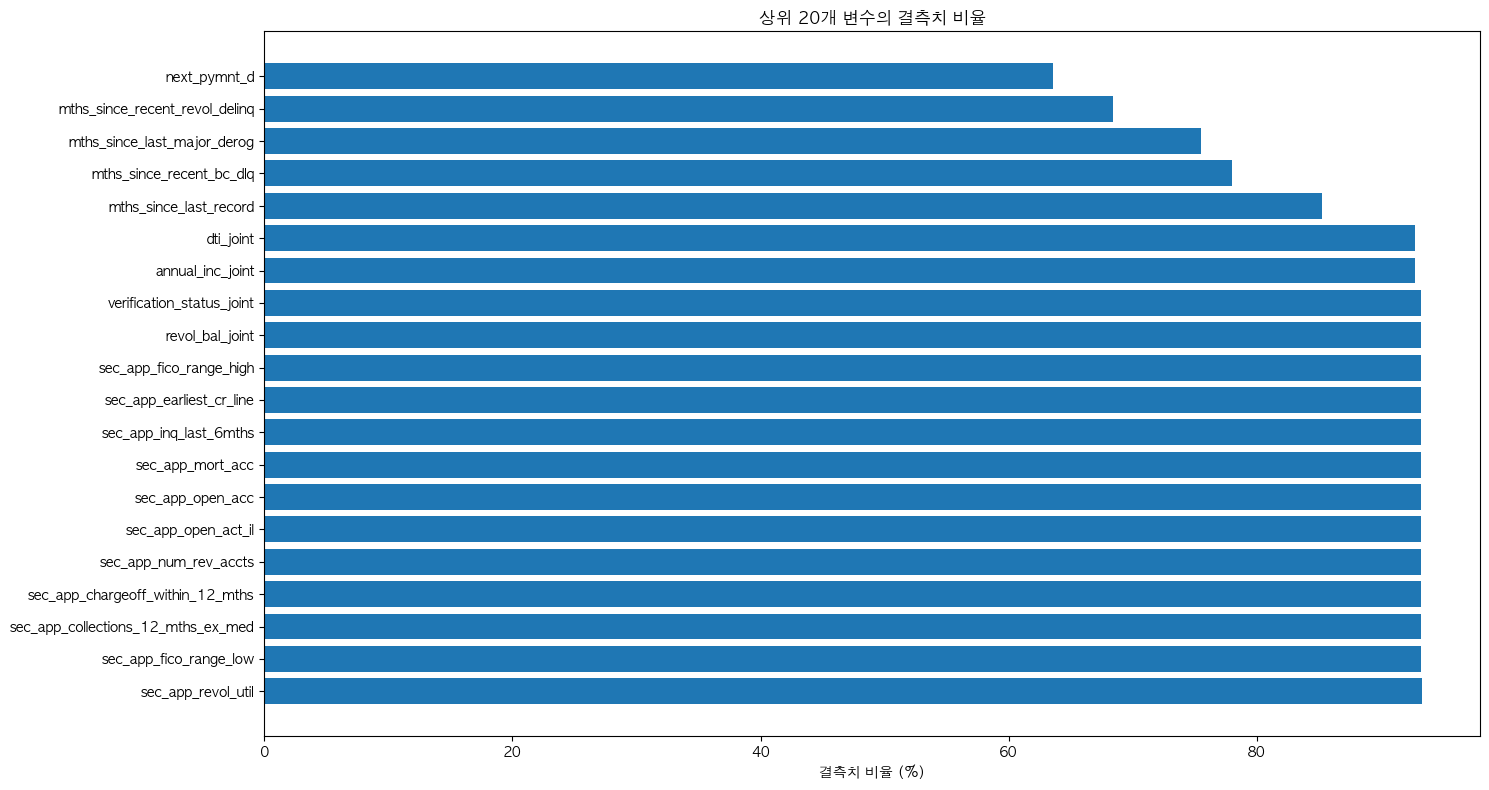


📊 결측치 패턴:
- 결측치가 없는 변수: 36개
- 결측치가 있는 변수: 87개
- 50% 이상 결측치: 21개
- 80% 이상 결측치: 16개


In [159]:
# 결측치 확인 함수
def check_missing_values(df):
  # 결측치 분석
  print("🔍 결측치 분석")

  # 결측치 비율 계산
  missing_ratios = (df.isnull().sum() / len(df)) * 100
  missing_df = pd.DataFrame({
      '변수명': missing_ratios.index,
      '결측치 수': df.isnull().sum(),
      '결측치 비율(%)': missing_ratios.values
  }).sort_values('결측치 비율(%)', ascending=False)

  # 결측치가 있는 변수만 필터링
  missing_vars = missing_df[missing_df['결측치 비율(%)'] > 0]
  print(f"\n📋 결측치가 있는 변수: {len(missing_vars)}개")
  print(missing_vars.head(20))

  # 결측치 시각화 (상위 20개만)
  if len(missing_vars) > 0:
      plt.figure(figsize=(15, 8))
      top_missing = missing_vars.head(20)
      plt.barh(range(len(top_missing)), top_missing['결측치 비율(%)'])
      plt.yticks(range(len(top_missing)), top_missing['변수명'])
      plt.xlabel('결측치 비율 (%)')
      plt.title('상위 20개 변수의 결측치 비율')
      plt.tight_layout()
      plt.show()

  # 결측치 패턴 분석
  print(f"\n📊 결측치 패턴:")
  print(f"- 결측치가 없는 변수: {len(missing_df[missing_df['결측치 비율(%)'] == 0])}개")
  print(f"- 결측치가 있는 변수: {len(missing_vars)}개")
  print(f"- 50% 이상 결측치: {len(missing_vars[missing_vars['결측치 비율(%)'] >= 50])}개")
  print(f"- 80% 이상 결측치: {len(missing_vars[missing_vars['결측치 비율(%)'] >= 80])}개")

# 결측치 확인
print("전체 변수 : ", len(df.columns))
check_missing_values(df)

# 이상값 처리 모음

In [119]:
# if df['annual_inc'] in df.columns and df['annual_inc'].isnull().sum() > 0:
#     print('annual_inc 결측치 있음')
#     # 결측치 중앙값으로 대체
#     df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)


# if df['annual_inc_joint'] in df.columns and df['annual_inc_joint'].isnull().sum() > 0:
#     print('annual_inc_joint 결측치 있음')
#     # 결측치 중앙값으로 대체
#     df['annual_inc_joint'].fillna(df['annual_inc_joint'].median(), inplace=True)


#### ----


# 이상 로우 제거
df = df[df['id'] != 'Loans that do not meet the credit policy']

# % 기호 제거
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)

# dti 이상치 처리
if 'dti' in df.columns:
  df['dti'] = np.where(df['dti'] >= 999, df['dti'].median(), df['dti'])

# revol_util 이상치 처리
# revol_util 100% 초과값 클리핑
if 'revol_util' in df.columns:
  df['revol_util'] = np.clip(df['revol_util'], 0, 100)

# annual_inc 이상치 처리
if 'annual_inc' in df.columns:
  print(f"  처리 전 annual_inc 통계:", df['annual_inc'].describe())

  Q1 = df['annual_inc'].quantile(0.25)
  Q3 = df['annual_inc'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers_iqr = ((df['annual_inc'] < lower_bound) | (df['annual_inc'] > upper_bound)).sum()
  print(f"    IQR 기반 이상값 개수: {outliers_iqr}개")

  if outliers_iqr > 0:
    # 이상값을 상한값으로 클리핑
    df.loc[df['annual_inc'] > upper_bound, 'annual_inc'] = upper_bound
    df.loc[df['annual_inc'] < lower_bound, 'annual_inc'] = lower_bound
  print(f"  처리 후 annual_inc 통계:", df['annual_inc'].describe())
  print(f"  처리 후 annual_inc 이상값 개수:", df['annual_inc'].describe())

# annual_inc_joint 이상치 처리
if 'annual_inc_joint' in df.columns:
  print(f"  처리 전 annual_inc_joint 통계:", df['annual_inc_joint'].describe())

  Q1 = df['annual_inc_joint'].quantile(0.25)
  Q3 = df['annual_inc_joint'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers_iqr = ((df['annual_inc_joint'] < lower_bound) | (df['annual_inc_joint'] > upper_bound)).sum()
  print(f"    IQR 기반 이상값 개수: {outliers_iqr}개")

  if outliers_iqr > 0:
    # 이상값을 상한값으로 클리핑
    df.loc[df['annual_inc_joint'] > upper_bound, 'annual_inc_joint'] = upper_bound
    df.loc[df['annual_inc_joint'] < lower_bound, 'annual_inc_joint'] = lower_bound
  print(f"  처리 후 annual_inc_joint 통계:", df['annual_inc_joint'].describe())

TypeError: unhashable type: 'Series'

# 결측치 처리 모음

In [97]:
if df['annual_inc'] in df.columns and df['annual_inc'].isnull().sum() > 0:
    print('annual_inc 결측치 있음')
    # 결측치 중앙값으로 대체
    df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)


if df['annual_inc_joint'] in df.columns and df['annual_inc_joint'].isnull().sum() > 0:
    print('annual_inc_joint 결측치 있음')
    # 결측치 중앙값으로 대체
    df['annual_inc_joint'].fillna(df['annual_inc_joint'].median(), inplace=True)


if 'dti' in df.columns:
    # 결측치를 중앙값으로 대체
    df['dti'].fillna(df['dti'].median(), inplace=True)

print(df['revol_util'].describe())

# if 'revol_util' in df.columns:
#     print('revol_util 결측치 있음')
#     # 결측치 중앙값으로 대체
#     df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

TypeError: unhashable type: 'Series'

In [68]:


# 승인 시점 변수 식별
approval_vars = [
        # 대출 기본 정보 (승인 시점에 결정)
        'loan_amnt', 'funded_amnt', 'int_rate', 'installment',
        'grade', 'sub_grade', 'term',
        
        # 신용 정보 (승인 시점에 확인 가능)
        'fico_range_low', 'fico_range_high', 'fico_avg',
        'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
        'revol_bal', 'revol_util', 'total_acc',
        'open_acc', 'open_acc_6m', 'open_act_il',
        'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
        'total_bal_il', 'il_util', 'open_rv_12m',
        'open_rv_24m', 'max_bal_bc', 'all_util',
        'inq_fi', 'total_cu_tl', 'inq_last_12m',
        'mths_since_recent_inq', 'mths_since_recent_bc',
        'num_accts_ever_120_pd', 'num_il_tl', 'num_tl_120dpd_2m',
        'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
        'pct_tl_nvr_dlq', 'num_tl_60dpd_2m', 'num_tl_ser_60dpd',
        'num_tl_ser_90dpd', 'num_bc_sats', 'num_bc_tl',
        'num_sats', 'num_tl_op_past_24m', 'pct_tl_nvr_dlq',
        'num_tl_60dpd_2m', 'num_tl_ser_60dpd', 'num_tl_ser_90dpd',
        'num_bc_sats', 'num_bc_tl', 'num_sats',
        'num_tl_op_past_24m', 'pct_tl_nvr_dlq',
        
        # 개인 정보 (승인 시점에 제공)
        'emp_length', 'annual_inc', 'dti', 'purpose',
        'home_ownership', 'addr_state', 'verification_status',
        'application_type', 'initial_list_status',
        
        # 추가 신용 정보
        'pub_rec_bankruptcies', 'chargeoff_within_12_mths',
        'collections_12_mths_ex_med', 'acc_now_delinq',
        'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
        'bc_open_to_buy', 'bc_util', 'mo_sin_rcnt_rev_tl_op',
        'mo_sin_rcnt_tl', 'mths_since_recent_bc_dlq',
        'mths_since_recent_revol_delinq', 'mths_since_recent_bc',
        'num_accts_ever_120_pd', 'num_il_tl', 'num_tl_120dpd_2m',
        'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
        'pct_tl_nvr_dlq', 'num_tl_60dpd_2m', 'num_tl_ser_60dpd',
        'num_tl_ser_90dpd', 'num_bc_sats', 'num_bc_tl',
        'num_sats', 'num_tl_op_past_24m', 'pct_tl_nvr_dlq',
        
        # 엔지니어링된 특성들 (승인 시점 기반)
        'sub_grade_ordinal', 'emp_length_numeric', 'emp_length_is_na',
        'home_ownership_cleaned', 'addr_state_optimized'
    ]

# 후행 컬럼 식별
posterior_vars = [
        # 대출 승인 후 발생하는 정보들
        'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 
        'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 
        'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 
        'hardship_dpd', 'hardship_length', 'last_pymnt_d', 
        'next_pymnt_d', 'last_credit_pull_d',
        
        # 대출 진행 상황 관련 변수들
        'total_rec_int', 'total_rec_late_fee', 'recoveries',
        'collection_recovery_fee', 'last_pymnt_amnt',
        'next_pymnt_d', 'last_credit_pull_d',
        
        # 어려움 관련 변수들
        'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
        'deferral_term', 'hardship_amount', 'hardship_start_date',
        'hardship_end_date', 'payment_plan_start_date',
        'hardship_length', 'hardship_dpd', 'hardship_loan_status',
        'orig_projected_additional_accrued_interest',
        'hardship_payoff_balance_amount', 'hardship_last_payment_amount',


        # 미래정보 관련 변수들
        'funded_amnt', 'funded_amnt_inv'
    ]
    
# 대출 승인 후 발생하는 정보들 제거
drop_future = [
        'funded_amnt', 'funded_amnt_inv',
        'collection_recovery_fee',
        'recoveries', 
        'total_rec_int',
        'total_rec_prncp', 
        'total_rec_late_fee', 
        'total_pymnt', 
        'total_pymnt_inv', 
        'last_pymnt_d', 
        'last_pymnt_amnt', 
        'next_pymnt_d', 
        'out_prncp', 
        'out_prncp_inv', 
        # 'last_credit_pull_d'
        ]
df.drop(drop_future, axis=1, inplace=True)

# hardship 관련 컬럼 제거
drop_hardship = ['hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term',
                 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 
                 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
                 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag']
df.drop(drop_hardship, axis=1, inplace=True)

# 공동신청자 관련 컬럼 제거
drop_sec_app = [
    'sec_app_fico_range_low',
    'sec_app_fico_range_high',
    'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_revol_util',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'revol_bal_joint',
    'dti_joint',
    'annual_inc_joint',
]
df.drop(drop_sec_app, axis=1, inplace=True)


# 불필요한 컬럼 제거
drop_useless = ['id', 'grade', 'emp_title', 'pymnt_plan', 'url', 'title', 'zip_code', 'policy_code', 
'inq_fi',
'inq_last_12m',
'inq_last_6mths',
'mths_since_recent_inq',
]
df.drop(drop_useless, axis=1, inplace=True)

# # 결측치 처리
# df['int_rate'] = df['int_rate'].fillna(df['int_rate'].mean())
# df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

# df.head()
# len(df.columns)
# for col in df.columns:
#     print(col)
    
df['home_ownership'].value_counts()


✓ 데이터 로드 완료: (100000, 141)


home_ownership
MORTGAGE    49233
RENT        39663
OWN         10989
ANY           108
OTHER           4
NONE            3
Name: count, dtype: int64

# 이상치 체크 클래스 - IQR 방식

In [35]:
class OutlierHandler(BaseEstimator, TransformerMixin):
    """이상치 처리"""
    
    def __init__(self, method='iqr', threshold=1.5):
        self.method = method
        self.threshold = threshold
        self.outlier_bounds = {}
        
    def fit(self, X, y=None):
        # 수치형 변수만 처리
        numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
        if 'target' in numerical_cols:
            numerical_cols.remove('target')
        
        for col in numerical_cols:
            if col in X.columns:
                Q1 = X[col].quantile(0.25)
                Q3 = X[col].quantile(0.75)
                IQR = Q3 - Q1
                
                lower_bound = Q1 - self.threshold * IQR
                upper_bound = Q3 + self.threshold * IQR
                
                self.outlier_bounds[col] = {
                    'lower': lower_bound,
                    'upper': upper_bound,
                    'Q1': Q1,
                    'Q3': Q3,
                    'IQR': IQR
                }
        
        return self
        
    def transform(self, X):
        outlier_count = 0
        
        for col, bounds in self.outlier_bounds.items():
            if col in X.columns:
                # 이상치 개수 계산
                outliers = ((X[col] < bounds['lower']) | (X[col] > bounds['upper']))
                outlier_count += outliers.sum()
                
                # 이상치를 상한/하한값으로 클리핑
                X[col] = X[col].clip(lower=bounds['lower'], upper=bounds['upper'])
        
        print(f"✓ 이상치 처리 완료: {outlier_count}개 → 0개")
        return X

print("✅ OutlierHandler 클래스 정의 완료")

✅ OutlierHandler 클래스 정의 완료


# Target 변수

In [27]:
# Target 변수 생성 - lown_status → target
loan_status_mapping = {
    'Fully Paid': 0, 'Current': 0, 'In Grace Period': 0,
    'Late (16-30 days)': 1, 
    'Late (31-120 days)': 1,
    'Charged Off': 1, 
    'Default': 1,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 1,
}
df['target'] = df['loan_status'].map(loan_status_mapping)

# 원본 loan_status 분포 확인
print(f"\n📊 원본 loan_status 분포:")
loan_status_counts = df['loan_status'].value_counts()
for status, count in loan_status_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  - {status}: {count:,}개 ({percentage:.2f}%)")

# 타겟 변수 분포 확인
target = df['target']
target_dist = df['target'].value_counts()
print(f"\n🎯 타겟 변수 분포:")
print(f"  - 정상 (0): {target_dist[0]:,}개 ({(target_dist[0]/len(target)*100):.2f}%)")
print(f"  - 부도 (1): {target_dist[1]:,}개 ({(target_dist[1]/len(target)*100):.2f}%)")



📊 원본 loan_status 분포:
  - Fully Paid: 51,224개 (51.22%)
  - Current: 35,194개 (35.19%)
  - Charged Off: 12,385개 (12.38%)
  - Late (31-120 days): 544개 (0.54%)
  - In Grace Period: 336개 (0.34%)
  - Late (16-30 days): 105개 (0.10%)
  - Issued: 81개 (0.08%)
  - Does not meet the credit policy. Status:Fully Paid: 77개 (0.08%)
  - Does not meet the credit policy. Status:Charged Off: 41개 (0.04%)
  - Default: 13개 (0.01%)

🎯 타겟 변수 분포:
  - 정상 (0): 86,831개 (86.83%)
  - 부도 (1): 13,088개 (13.09%)


# emp_length 전처리

In [28]:
# emp_length 전처리 
if 'emp_length' in df.columns:
    # 고용 기간 매핑
    emp_length_mapping = {
        '< 1 year': 0.5,
        '1 year': 1,
        '2 years': 2,
        '3 years': 3,
        '4 years': 4,
        '5 years': 5,
        '6 years': 6,
        '7 years': 7,
        '8 years': 8,
        '9 years': 9,
        '10+ years': 10
    }
    
    # 결측 플래그 생성
    # df['emp_length_is_na'] = df['emp_length'].isnull().astype(int)
    
    # 수치화 적용
    df['emp_length_numeric'] = df['emp_length'].map(emp_length_mapping)
    df['emp_length_numeric'].fillna(0, inplace=True)

    print(f"✓ emp_length 수치화 완료")
    print(f"  수치화 범위: 0.5 ~ 10")
    # print(f"  결측 플래그 생성: {df['emp_length_is_na'].sum()}개")
    print(f"  평균 고용 기간: {df['emp_length_numeric'].mean():.2f}년")
        

✓ emp_length 수치화 완료
  수치화 범위: 0.5 ~ 10
  평균 고용 기간: 5.45년


# FICO 처리

In [31]:
# FICO 관련 특성
fico_columns = [
    'fico_range_low', 
    'fico_range_high', 
    'last_fico_range_low', 
    'last_fico_range_high'
]

available_fico_cols = [col for col in fico_columns if col in df.columns]

# print(available_fico_cols)

# fico 평균값 계산
if 'fico_range_low' in df.columns:
  df['fico_avg'] = (pd.to_numeric(df['fico_range_low'], errors='coerce') +
                                pd.to_numeric(df['fico_range_high'], errors='coerce')) / 2


if 'last_fico_range_low' in df.columns:
  df['last_fico_avg'] = (pd.to_numeric(df['last_fico_range_low'], errors='coerce') +
                                pd.to_numeric(df['last_fico_range_high'], errors='coerce')) / 2

# fico 변화율 계산
if 'fico_avg' in df.columns and 'last_fico_avg' in df.columns:
  df['fico_change'] = df['last_fico_avg'] - df['fico_avg']
  df['fico_change_rate'] = df['fico_change'] / (df['fico_avg'] + 1e-8)

# fico 구간화
if 'fico_avg' in df.columns:
  fico_bins = list(range(300, 850, 50)) + [850]
  fico_labels = [f'{fico_bins[i]}-{fico_bins[i+1]-1}' for i in range(len(fico_bins)-1)]
  df['fico_range'] = pd.cut(df['fico_avg'], bins=fico_bins, labels=fico_labels, include_lowest=True)


print(df['fico_avg'].head())
print(df['last_fico_avg'].head())


0    757.0
1    717.0
2    672.0
3    677.0
4    687.0
Name: fico_avg, dtype: float64
0    762.0
1    752.0
2    637.0
3    667.0
4    667.0
Name: last_fico_avg, dtype: float64


# annual_inc, annual_inc_joint 전처리

In [32]:
# OutlierHandler 인스턴스 생성
outlier_handler = OutlierHandler(method='iqr', threshold=1.5)

if 'annual_inc' in df.columns:
    if df['annual_inc'].isnull().sum() > 0:
        print('annual_inc 결측치 있음')
        # 결측치 중앙값으로 대체
        df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)
    
    # 이상치 처리
    outliers = detect_outliers_iqr(df, 'annual_inc')
    print(outliers)
    
    
    # 로그 변환 적용
    df['annual_inc_log'] = np.log1p(df['annual_inc'])

if 'annual_inc_joint' in df.columns:
    if df['annual_inc_joint'].isnull().sum() > 0:
        print('annual_inc_joint 결측치 있음')
        # 결측치 중앙값으로 대체
        df['annual_inc_joint'].fillna(df['annual_inc_joint'].median(), inplace=True)
    
    # 로그 변환 적용
    df['annual_inc_joint_log'] = np.log1p(df['annual_inc_joint'])


# df['annual_inc'].describe() 


NameError: name 'OutlierHandler' is not defined

In [11]:

# 내가 전처리 한것과 변수 최종 선택한 것 차이 로그찍기

df.columns

selected_variables_by_team = [
'loan_amnt',
'term',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'issue_d',
'loan_status',
'title',
'dti',
'delinq_2yrs',
'earliest_cr_line',
'fico_range_low',
'fico_range_high',
'inq_last_6mths',
'mths_since_last_record',
'open_acc',
'pub_rec',
'revol_util',
'initial_list_status',
'collections_12_mths_ex_med',
'application_type',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'tot_coll_amt',
'open_act_il',
'chargeoff_within_12_mths',
'mort_acc',
'num_rev_accts',
'tax_liens',
'revol_bal_joint',
'sec_app_fico_range_low',
'sec_app_fico_range_high',
'sec_app_earliest_cr_line',
'sec_app_inq_last_6mths',
'sec_app_mort_acc',
'sec_app_open_acc',
'sec_app_revol_util',
'sec_app_open_act_il',
'sec_app_num_rev_accts',
'sec_app_chargeoff_within_12_mths',
'sec_app_collections_12_mths_ex_med',
]

# for col in selected_variables_by_team:
#   if col not in df.columns:
#     print(col)


title
inq_last_6mths
annual_inc_joint
dti_joint
revol_bal_joint
sec_app_fico_range_low
sec_app_fico_range_high
sec_app_earliest_cr_line
sec_app_inq_last_6mths
sec_app_mort_acc
sec_app_open_acc
sec_app_revol_util
sec_app_open_act_il
sec_app_num_rev_accts
sec_app_chargeoff_within_12_mths
sec_app_collections_12_mths_ex_med


In [ ]:
# 대출 승인 후 발생하는 정보들 제거
drop_future = [
        'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 
        'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 
        'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 
        'last_pymnt_d', 
        'next_pymnt_d', 'last_credit_pull_d'
        ]


for col in drop_future:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)


# hardship 관련 컬럼 제거
drop_hardship = ['hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term',
                 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 
                 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 
                 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag']
for col in drop_hardship:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# 공동신청자 관련 컬럼 제거
drop_sec_app = [
    'sec_app_fico_range_low',
    'sec_app_fico_range_high',
    'sec_app_earliest_cr_line',
    'sec_app_inq_last_6mths',
    'sec_app_mort_acc',
    'sec_app_open_acc',
    'sec_app_revol_util',
    'sec_app_open_act_il',
    'sec_app_num_rev_accts',
    'sec_app_chargeoff_within_12_mths',
    'sec_app_collections_12_mths_ex_med',
    'revol_bal_joint',
    'dti_joint',
    'annual_inc_joint',
]
for col in drop_sec_app:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)


In [ ]:
len(df.columns)

126

# 고결측치 처리 - 미완

In [25]:
# 결측치 비율 계산
missing_threshold = 0 # 5% → 0%로 변경 (모든 결측치 처리)
missing_ratios = (df.isnull().sum() / len(df)) * 100
high_missing_features = missing_ratios[missing_ratios >= missing_threshold].index.tolist()
imputers = {}

# 각 변수별 imputer 학습
for feature in high_missing_features:
    if feature in df.columns:
        if df[feature].dtype in ['object', 'category']:
            # 범주형: 최빈값
            mode_value = df[feature].mode().iloc[0] if not df[feature].mode().empty else 'Unknown'
            imputers[feature] = ('mode', mode_value)
        else:
            # 수치형: 중앙값
            median_value = df[feature].median()
            imputers[feature] = ('median', median_value)

print(f"✓ 결측치 처리 준비: {len(high_missing_features)}개 (임계값: {missing_threshold}%)")

# 결측치 처리
# for feature, (imputer_type, value) in imputers.items():
#     if feature in df.columns:
#         if imputer_type == 'mode':
#             df[feature].fillna(value, inplace=True)
#         elif imputer_type == 'median':
#             df[feature].fillna(value, inplace=True)

# 결측치 처리 후 확인
df.isnull().sum()

✓ 결측치 처리 준비: 101개 (임계값: 0%)


loan_amnt                  0
term                       0
int_rate                   0
installment                0
sub_grade                  0
                          ..
earliest_cr_date           0
credit_history_months      0
credit_history_years       0
credit_history_category    0
addr_state_optimized       0
Length: 101, dtype: int64

# 범주형 변수 인코딩
- sub_grade
  - sub_grade_ordinal 파생
- emp_length
  - emp_length_numeric 파생
  - emp_length_is_na 파생
- home_ownership
  - home_ownership_cleaned 파생
- addr_state
  - addr_state_optimized

In [41]:
# sub_grade 순서형 인코딩 매핑
if 'sub_grade' in df.columns:
    grade_order = ['A1', 'A2', 'A3', 'A4', 'A5',
                    'B1', 'B2', 'B3', 'B4', 'B5',
                    'C1', 'C2', 'C3', 'C4', 'C5',
                    'D1', 'D2', 'D3', 'D4', 'D5',
                    'E1', 'E2', 'E3', 'E4', 'E5',
                    'F1', 'F2', 'F3', 'F4', 'F5',
                    'G1', 'G2', 'G3', 'G4', 'G5']
    sub_grade_mapping = {grade: idx for idx, grade in enumerate(grade_order)}
    
    # 매핑 적용
    df['sub_grade_ordinal'] = df['sub_grade'].map(sub_grade_mapping).fillna(0)
    print(df['sub_grade_ordinal'].head())
        
# emp_length 매핑
if 'emp_length' in df.columns:
    emp_length_mapping = {
        '< 1 year': 0.5,
        '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5,
        '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10
    }

    # 매핑 적용
    df['emp_length_numeric'] = df['emp_length'].map(emp_length_mapping).fillna(0)
    df['emp_length_is_na'] = df['emp_length'].isna().astype(int)
    print(df['emp_length_numeric'].head())
    print(df['emp_length_is_na'].head())

# home_ownership 카테고리 정리
if 'home_ownership' in df.columns:
    # 원본 분포 확인
    print("\nhome_ownership 전처리")
    print("-" * 40)
    original_dist = df['home_ownership'].value_counts()
    print(f"  원본 분포:")
    for ownership, count in original_dist.items():
        print(f"    {ownership}: {count}개")
    
    # NONE/ANY → OTHER로 변경
    df['home_ownership_cleaned'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
    
    # 정리된 분포 확인
    cleaned_dist = df['home_ownership_cleaned'].value_counts()
    print(f"  정리된 분포:")
    for ownership, count in cleaned_dist.items():
        print(f"    {ownership}: {count}개")

# addr_state 전처리 - 주(state) 데이터 처리
if 'addr_state' in df.columns:
    # 원본 분포 확인
    print("\naddr_state 전처리")
    print("-" * 40)
    state_counts = df['addr_state'].value_counts()
    total_count = len(df)
    cumulative_percent = (state_counts.cumsum() / total_count) * 100
    keep_states = cumulative_percent[cumulative_percent <= 99].index.tolist()

    # 매핑 적용
    df['addr_state_optimized'] = df['addr_state'].apply(
        lambda x: x if x in keep_states else 'OTHER'
    )

    print(f"✓ 주 데이터 최적화: {df['addr_state'].nunique()} → {df['addr_state_optimized'].nunique()}개")
  

0     4
1    11
2    23
3     6
4    13
Name: sub_grade_ordinal, dtype: int64
0     2.0
1     2.0
2    10.0
3    10.0
4    10.0
Name: emp_length_numeric, dtype: float64
0    0
1    0
2    0
3    0
4    0
Name: emp_length_is_na, dtype: int64

home_ownership 전처리
----------------------------------------
  원본 분포:
    MORTGAGE: 49233개
    RENT: 39663개
    OWN: 10989개
    ANY: 108개
    OTHER: 4개
    NONE: 3개
  정리된 분포:
    MORTGAGE: 49233개
    RENT: 39663개
    OWN: 10989개
    OTHER: 115개


# 범주형 변수 - 카이제곱 검증

In [40]:
# 카이제곰 독립성 검정 함수
def chi_square_independence_test(df, categorical_col, target_col='target'):
    """카이제곱 독립성 검정 함수"""
    if categorical_col not in df.columns or target_col not in df.columns:
        return None
    
    # 교차표 생성
    contingency_table = pd.crosstab(df[categorical_col], df[target_col])
    
    # 카이제곱 검정 수행
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # p < 0.05: 유의한 관계 존재 (독립적이 아님)
    # p ≥ 0.05: 유의한 관계 없음 (독립적)

    return {
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'contingency_table': contingency_table
    }

# 주요 범주형 변수들에 대해 검정 수행
categorical_vars = ['sub_grade', 'home_ownership_cleaned', 'purpose', 'grade', 'verification_status']
available_vars = [col for col in categorical_vars if col in df.columns]

chi_square_results = {}
for var in available_vars:
    result = chi_square_independence_test(df, var)
    if result:
        chi_square_results[var] = result
        print(f"  {var}: χ²={result['chi2_statistic']:.2f}, p={result['p_value']:.4f}")
        if result['p_value'] < 0.05:
            print(f"    ✓ 유의한 관계 존재 (p < 0.05)")
        else:
            print(f"    ✗ 유의한 관계 없음 (p >= 0.05)")

# 시계열 전처리
- issue_date
  - issue_year
    - is_recession_year
  - issue_month
    - issue_season, 
  - issue_quarter

- earliest_cr_line
  - earliest_cr_date

- last_pymnt_d
  - last_pymnt_date
  - days_since_last_payment

In [18]:
# 날짜 관련 컬럼 확인
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d']
available_date_cols = [col for col in date_columns if col in df.columns]

if len(available_date_cols) >= 2:
  # 대출 발행 시점 정보 추출
  if 'issue_d' in df.columns:
    df['issue_date'] = pd.to_datetime(df['issue_d'], format='%b-%Y', errors='coerce')
    df['issue_year'] = df['issue_date'].dt.year
    df['issue_month'] = df['issue_date'].dt.month
    df['issue_quarter'] = df['issue_date'].dt.quarter
    
    # 계절성 특성
    df['issue_season'] = df['issue_month'].map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    })
    
    # 경제 사이클 특성
    df['is_recession_year'] = df['issue_year'].isin([2008, 2009, 2020]).astype(int)

  # 신용 이력 기간 계산
  if 'earliest_cr_line' in df.columns and 'issue_d' in df.columns:
    df['earliest_cr_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y', errors='coerce')
    df['credit_history_months'] = ((df['issue_date'] - df['earliest_cr_date']).dt.days / 30.44).fillna(0)
    df['credit_history_years'] = df['credit_history_months'] / 12

    # 신용 이력 구간화
    df['credit_history_category'] = pd.cut(
        df['credit_history_years'],
        bins=[0, 2, 5, 10, 50],
        labels=['New', 'Young', 'Established', 'Veteran']
    )

  # 마지막 결제일 정보
  if 'last_pymnt_d' in df.columns:
    df['last_pymnt_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y', errors='coerce')
    df['days_since_last_payment'] = (pd.Timestamp.now() - df['last_pymnt_date']).dt.days.fillna(0)

print(f"✓ 시간 기반 특성: 12개 특성 생성")

✓ 시간 기반 특성: 12개 특성 생성


In [59]:
# 프로젝트 루트 경로 추가
sys.path.append(os.path.join(os.path.dirname('.'), '..'))

from lending_club_project.config.file_paths import (
    SAMPLE_DATA_PATH,
    REPORTS_DIR,
    ensure_directory_exists,
    PROJECT_ROOT
)

df = pd.read_csv(PROJECT_ROOT / "feature_engineering" / "lending_club_sample_encoded.csv")
# df = pd.read_csv(PROJECT_ROOT / "feature_engineering" / "lending_club_sample_scaled_minmax.csv")
# df = pd.read_csv(PROJECT_ROOT / "feature_engineering" / "lending_club_sample_scaled_standard.csv")
# df = pd.read_csv(PROJECT_ROOT / "feature_engineering" / "lending_club_sample_with_new_features.csv")

# df.head()

# df.columns

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 157 entries, id to term_ 60 months
dtypes: bool(16), float64(107), int64(5), object(29)
memory usage: 109.1+ MB


,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,purpose,dti,delinq_2yrs,fico_range_low,...,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,target,sub_grade_ordinal,emp_length_is_na,emp_length_numeric
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,99891.000000,99999.000000,100000.00000,...,6287.000000,5009.000000,5009.00000,6183.000000,6287.000000,6287.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,9.769785e+07,15375.593000,15370.264750,15354.603170,452.620733,7.971237e+04,2.680050,19.357017,0.285673,700.69470,...,116.728896,2.231982,2.38890,367.691372,11944.719571,736.876860,0.12848,9.739700,0.071330,5.448815
std,5.122541e+07,9472.018131,9470.139163,9474.200956,272.573081,7.516986e+04,2.377099,15.956952,0.821228,33.79115,...,245.140602,0.559273,6.28189,485.042186,9101.908374,2033.865654,0.34052,6.172355,0.257377,3.854235
min,6.633900e+04,900.000000,900.000000,0.000000,27.820000,0.000000e+00,0.000000,0.000000,0.000000,630.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.00000,0.000000,0.000000,0.000000
25%,5.901359e+07,8000.000000,8000.000000,8000.000000,254.022500,4.700000e+04,2.000000,12.120000,0.000000,675.00000,...,0.000000,2.000000,0.00000,104.600000,4751.060000,256.785000,0.00000,5.000000,0.000000,2.000000
50%,1.072654e+08,13000.000000,13000.000000,13000.000000,382.500000,6.600000e+04,2.000000,18.140000,0.000000,695.00000,...,0.000000,2.000000,0.00000,254.610000,9932.700000,415.450000,0.00000,9.000000,0.000000,5.000000
75%,1.432613e+08,20000.000000,20000.000000,20000.000000,602.300000,9.500000e+04,2.000000,24.880000,0.000000,720.00000,...,84.710000,2.000000,0.00000,475.222700,17489.865000,674.555000,0.00000,14.000000,0.000000,10.000000
max,1.710144e+08,40000.000000,40000.000000,40000.000000,1714.540000,8.500000e+06,13.000000,999.000000,30.000000,845.00000,...,1425.120000,4.000000,47.00000,11581.800000,40655.200000,38021.250000,1.00000,34.000000,1.000000,10.000000


In [75]:
# 주요 범주형 변수 지정 (개선된 특성 제외)
categorical_cols = [
    'home_ownership', 'purpose', 'grade', 'verification_status', 
    'application_type', 'initial_list_status', 'term'
]


KeyError: 'hardship_flag'

# ------

# 수치형 변수
- dti
- revol_util

In [80]:
outlier_results = {}

if 'dti' in df.columns:
  original_dti_stats = df['dti'].describe()
  print(f"  처리 전 dti 통계:")
  print(f"    평균: {original_dti_stats['mean']:.2f}")
  print(f"    표준편차: {original_dti_stats['std']:.2f}")
  print(f"    최대값: {original_dti_stats['max']:.2f}")

  # 999 이상값 개수 확인
  outliers_999 = (df['dti'] >= 999).sum()
  print(f"    999 이상값 개수: {outliers_999}개")

  if outliers_999 > 0:
    # 999 이상값을 결측치로 처리
    df.loc[df['dti'] >= 999, 'dti'] = np.nan
    
    # 결측치를 중앙값으로 대체
    median_dti = df['dti'].median()
    df['dti'].fillna(median_dti, inplace=True)
    
    print(f"    ✓ 999 이상값을 중앙값({median_dti:.2f})으로 대체")
    
    # 처리 후 통계
    processed_dti_stats = df['dti'].describe()
    print(f"  처리 후 dti 통계:")
    print(f"    평균: {processed_dti_stats['mean']:.2f}")
    print(f"    표준편차: {processed_dti_stats['std']:.2f}")
    print(f"    최대값: {processed_dti_stats['max']:.2f}")

    # outlier_results['dti'] = {
    #     'outliers_removed': outliers_999,
    #     'replacement_value': median_dti,
    #     'original_max': original_dti_stats['max'],
    #     'processed_max': processed_dti_stats['max']
    # }

if 'revol_util' in df.columns:
  original_revol_stats = df['revol_util'].describe()
  print(f"  처리 전 revol_util 통계:")
  print(f"    평균: {original_revol_stats['mean']:.2f}")
  print(f"    최대값: {original_revol_stats['max']:.2f}")
  
  # 100% 초과값 개수 확인
  outliers_100 = (df['revol_util'] > 100).sum()
  print(f"    100% 초과값 개수: {outliers_100}개")
  
  if outliers_100 > 0:
      # 100% 초과값을 100%로 클리핑
      df.loc[df['revol_util'] > 100, 'revol_util'] = 100
      
      print(f"    ✓ 100% 초과값을 100%로 클리핑")
      
      # 처리 후 통계
      processed_revol_stats = df['revol_util'].describe()
      print(f"  처리 후 revol_util 통계:")
      print(f"    평균: {processed_revol_stats['mean']:.2f}")
      print(f"    최대값: {processed_revol_stats['max']:.2f}")
      
      # outlier_results['revol_util'] = {
      #     'outliers_clipped': outliers_100,
      #     'clip_value': 100,
      #     'original_max': original_revol_stats['max'],
      #     'processed_max': processed_revol_stats['max']
      # }

  처리 전 dti 통계:
    평균: 19.28
    표준편차: 13.33
    최대값: 847.20
    999 이상값 개수: 0개
  처리 전 revol_util 통계:
    평균: 48.96
    최대값: 150.70
    100% 초과값 개수: 303개
    ✓ 100% 초과값을 100%로 클리핑
  처리 후 revol_util 통계:
    평균: 48.95
    최대값: 100.00


In [88]:
# df.info()

count = 0
numeric_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numeric_cols.append(col)
        count += 1
        print(col)

print(count)

df['int_rate'].describe()

loan_amnt
int_rate
installment
annual_inc
dti
delinq_2yrs
fico_range_low
fico_range_high
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
total_cu_tl
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
pub_rec_bankruptcies
t

count    100000.000000
mean         13.039139
std           4.854096
min           5.310000
25%           9.170000
50%          12.490000
75%          15.990000
max          30.990000
Name: int_rate, dtype: float64